<a href="https://colab.research.google.com/github/siruku6/MethematicsTrial/blob/master/easily_understandable_pattern_recognition/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# 第4章 パラメータ推定

## p.50 最尤推定 (Maximum Likelihood Estimation)

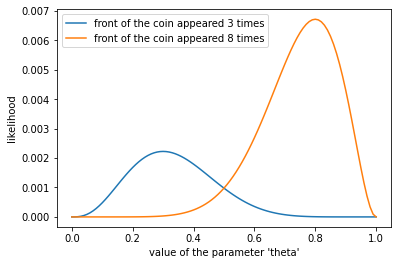

In [2]:
# 試行回数
n = 10


def calc_likelihoods(n: int, r: int):
    """
    n: 試行回数
    r: 表が出た回数
    """
    available_thetas = np.arange(0, 1.01, step=0.01)

    likelihoods = {}
    for theta in available_thetas:
        likelihood = (theta ** r) * ((1 - theta) ** (n - r))
        likelihoods[theta] = likelihood

    return pd.DataFrame.from_dict(likelihoods, orient="index")


likelihoods_3 = calc_likelihoods(n, 3)
likelihoods_8 = calc_likelihoods(n, 8)

plt.plot(likelihoods_3, label="front of the coin appeared 3 times")
plt.plot(likelihoods_8, label="front of the coin appeared 8 times")
plt.xlabel("value of the parameter 'theta'")
plt.ylabel("likelihood")
plt.legend()
plt.show()

## p.57 Beta分布

In [3]:
def number_of_combinations(n: int, r: int) -> int:
    """
    n: int ... total_num
    r: int ... subset_num
    """
    return math.factorial(n) / (math.factorial(r) * math.factorial(n - r))


def beta_distribution(theta: float, alpha: int, beta: int):
    """
    theta: 求めたいパラメータ値(たとえばコインが表になる確率)
    n = alpha - 1: 表が出た回数
    n - r = beta - 1: 裏が出た回数
    n = alpha + beta - 2: 総試行回数
    """
    n = alpha + beta - 2
    r = alpha - 1

    combination = number_of_combinations(n, r)
    binomial_dist = (theta ** r) * ((1 - theta) ** (n - r)) * combination
    beta_dist = (n + 1) * binomial_dist
    return beta_dist


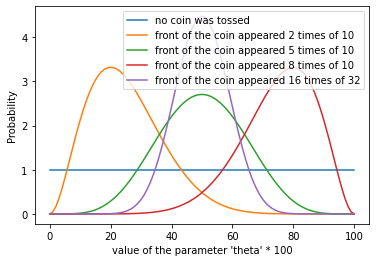

In [4]:
# 試行回数
# n = 10
# r = [2, 5, 8]
available_thetas = np.arange(0, 1.01, step=0.01)

beta_flat = beta_distribution(available_thetas, 1, 1)
beta_2 = beta_distribution(available_thetas, 3, 9)
beta_5 = beta_distribution(available_thetas, 6, 6)
beta_8 = beta_distribution(available_thetas, 9, 3)
beta_16 = beta_distribution(available_thetas, 16, 16)

plt.plot(beta_flat, label="no coin was tossed")
plt.plot(beta_2, label="front of the coin appeared 2 times of 10")
plt.plot(beta_5, label="front of the coin appeared 5 times of 10")
plt.plot(beta_8, label="front of the coin appeared 8 times of 10")
plt.plot(beta_16, label="front of the coin appeared 16 times of 32")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

## p.61 ベイズ推定の実験

$\textbf{x}^{(10)} = HHHHTHHTHT$

$p(\theta|\textbf{x}^{(0)}) = Be(1, 1)$  
$p(\theta|\textbf{x}^{(1)}) = Be(2, 1)$  
$p(\theta|\textbf{x}^{(2)}) = Be(3, 1)$  
$p(\theta|\textbf{x}^{(3)}) = Be(4, 1)$  
...  
$p(\theta|\textbf{x}^{(8)}) = Be(7, 3)$  
$p(\theta|\textbf{x}^{(9)}) = Be(8, 3)$  
$p(\theta|\textbf{x}^{(10)}) = Be(8, 4)$


これらを描画する

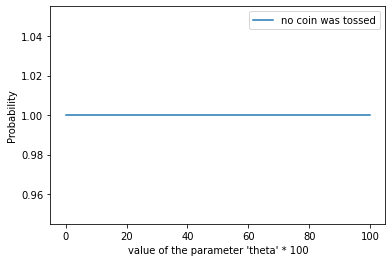

In [5]:
available_thetas = np.arange(0, 1.01, step=0.01)

result = beta_distribution(available_thetas, 1, 1)
plt.plot(result, label="no coin was tossed")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

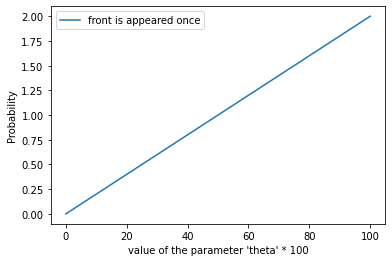

In [6]:
result = beta_distribution(available_thetas, 2, 1)
plt.plot(result, label="front is appeared once")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

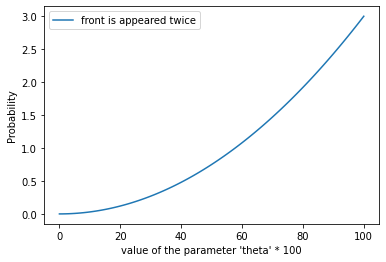

In [7]:
result = beta_distribution(available_thetas, 3, 1)
plt.plot(result, label="front is appeared twice")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

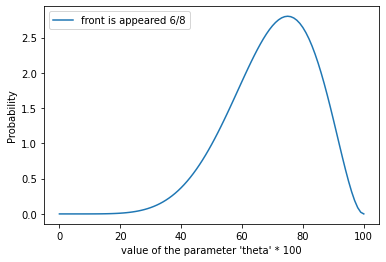

In [8]:
result = beta_distribution(available_thetas, 7, 3)
plt.plot(result, label="front is appeared 6/8")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

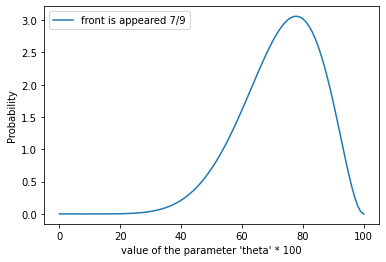

In [9]:
result = beta_distribution(available_thetas, 8, 3)
plt.plot(result, label="front is appeared 7/9")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

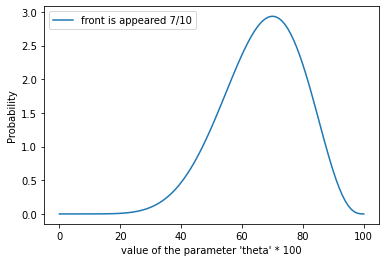

In [10]:
result = beta_distribution(available_thetas, 8, 4)
plt.plot(result, label="front is appeared 7/10")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

ベイズ推定を行うときに事前分布を一様関数と仮定する場合は、  
単にBeta分布を用いるだけで良いことがわかる。

## p.63 nを100や1000にする



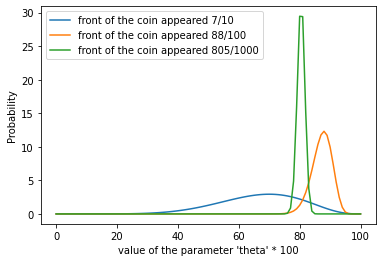

In [11]:
beta_10 = beta_distribution(available_thetas, 8, 4)
beta_100 = beta_distribution(available_thetas, 89, 13)
beta_1000 = beta_distribution(available_thetas, 806, 196)

plt.plot(beta_10, label="front of the coin appeared 7/10")
plt.plot(beta_100, label="front of the coin appeared 88/100")
plt.plot(beta_1000, label="front of the coin appeared 805/1000")

plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

## p.64 事前分布の効果

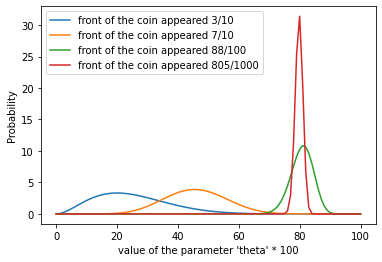

In [12]:
prior_distribution = beta_distribution(available_thetas, 3, 9)

beta_10 = beta_distribution(available_thetas, 8 + 3, 4 + 9)
beta_100 = beta_distribution(available_thetas, 89 + 3, 13 + 9)
beta_1000 = beta_distribution(available_thetas, 806 + 3, 196 + 9)

plt.plot(prior_distribution, label="front of the coin appeared 3/10")
plt.plot(beta_10, label="front of the coin appeared 7/10")
plt.plot(beta_100, label="front of the coin appeared 88/100")
plt.plot(beta_1000, label="front of the coin appeared 805/1000")

plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

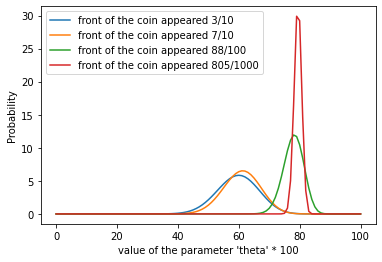

In [13]:
prior_distribution = beta_distribution(available_thetas, 31, 21)

beta_10 = beta_distribution(available_thetas, 8 + 31, 4 + 21)
beta_100 = beta_distribution(available_thetas, 89 + 31, 13 + 21)
beta_1000 = beta_distribution(available_thetas, 806 + 31, 196 + 21)

plt.plot(prior_distribution, label="front of the coin appeared 3/10")
plt.plot(beta_10, label="front of the coin appeared 7/10")
plt.plot(beta_100, label="front of the coin appeared 88/100")
plt.plot(beta_1000, label="front of the coin appeared 805/1000")

plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

ベイズ推定の事前分布をBeta分布とする場合は、推定結果を出す際に、事前分布であるBeta分布のαとβをベイズ推定に使うαとβにそれぞれ足してあげればよい。

これは、たとえば「10回のコイントス試行の前に、既に10回分コイントス試行が実施済みだった」と考えるとわかりやすい。
（この計算方法で良さそうだ、と直感的に感じられませんか？）

でも、こうすると、事前分布がBeta分布じゃなかった場合の実装方法がわからない、ということに気が付いた。どうしたものか...。（保留）

## p.69 ディリクレ分布

p.71の 式(4・70)を実装する


### 参考

- ディリクレ(Dirichlet)分布を3Dで可視化する  
https://cartman0.hatenablog.com/entry/2021/02/27/%E3%83%87%E3%82%A3%E3%83%AA%E3%82%AF%E3%83%AC%28Dirichlet%29%E5%88%86%E5%B8%83%E3%82%923D%E3%81%A7%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%99%E3%82%8B
- 【Python】ディリクレ分布の作図  
https://www.anarchive-beta.com/entry/2022/10/19/120500


2つ目のURLに記載されているコードは理解に時間がかかりそうだったので、1つ目の「ディリクレ(Dirichlet)分布を3Dで可視化する」を真似して実装する

In [14]:
from scipy import special


def dirichlet(thetas: np.ndarray, alphas: np.ndarray) -> np.ndarray:
    """
    ディリクレ分布の確率密度関数を返す

    p.71の 式(4・70)をと対応がわかりやすいような引数名、変数名にしたつもり

    ・numeratorは分子
    ・denominatorは分母のこと

    あとはnp.prodが積演算であることがわかれば、コードと式の対応が分かるはず。
    """
    sum_alpha = np.sum(alphas)
    gamma_numerator = special.gamma(sum_alpha)
    gamma_denominator = np.prod(special.gamma(alphas))

    probability_density_function = (
        gamma_numerator / gamma_denominator * np.prod(thetas ** (alphas - 1))
    )
    return probability_density_function


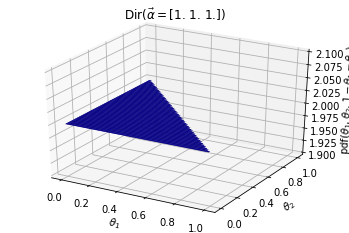

In [15]:
# 描画処理は数式を理解する際には本質的な問題ではないので、
# 前記参考記事をほぼ丸々コピーした

def show_3d_dirichlet_distribution(alphas: np.ndarray) -> None:
    xdata = np.linspace(0, 1, 200)
    ydata = np.linspace(0, 1, 200)
    X, Y = np.meshgrid(xdata, ydata)
    z = []
    X[X + Y > 1] = 0
    Y[X + Y > 1] = 0
    for _x, _y, _z in zip(X.flatten(), Y.flatten(), (1-X-Y).flatten()):
        z.append(dirichlet(np.array([_x, _y, _z]), alphas))

    Z = np.array(z).reshape(X.shape)
    ax3d = plt.axes(projection='3d')
    ax3d.plot_surface(X, Y, Z,cmap='plasma')
    # ax3d.set_zlim(zlim)
    ax3d.set_xlabel("$\\theta_1$")
    ax3d.set_ylabel("$\\theta_2$")
    ax3d.set_zlabel("pdf$(\\theta_1,\\theta_2,1-\\theta_1-\\theta_2)$")
    ax3d.set_title("Dir($\\vec{\\alpha} = $" + "%s)" % alphas)
    plt.show()


alphas = np.array([1., 1., 1.])
show_3d_dirichlet_distribution(alphas)

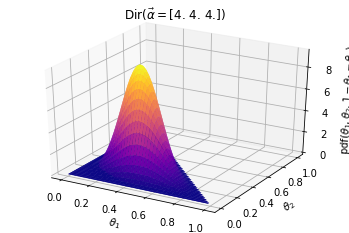

In [16]:
alphas = np.array([4., 4., 4.])
show_3d_dirichlet_distribution(alphas)

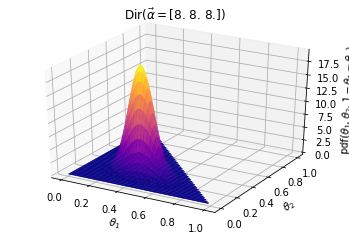

In [17]:
alphas = np.array([8., 8., 8.])
show_3d_dirichlet_distribution(alphas)

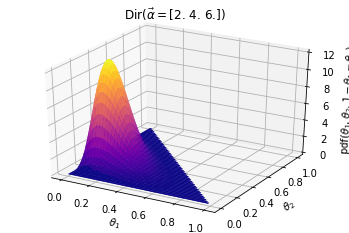

In [18]:
alphas = np.array([2., 4., 6.])
show_3d_dirichlet_distribution(alphas)